<a href="https://colab.research.google.com/github/rachmadyogoo/pengolahancitra_2025/blob/main/Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Praktikum 1 – Jarak Euclidean & Manhattan



Jarak Euclidean antara Patch 1 dan Patch 2: 24.7650
Jarak Euclidean antara Patch 1 dan Patch 3: 5.0000
Jarak Manhattan antara Patch 1 dan Patch 2: 936.4392
Jarak Manhattan antara Patch 1 dan Patch 3: 250.0000


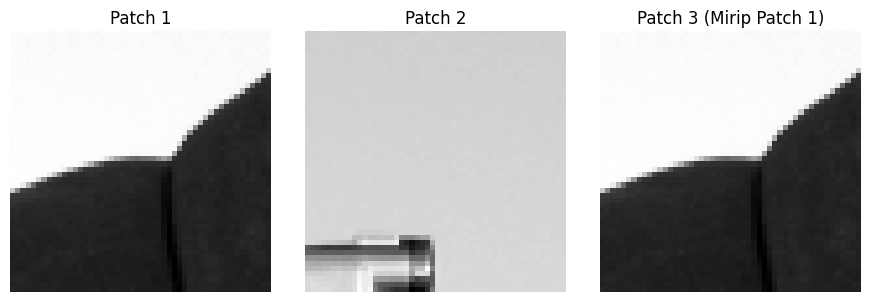

In [1]:
import numpy as np
from skimage import data, img_as_float
from scipy.spatial import distance
import matplotlib.pyplot as plt

image = img_as_float(data.camera())
patch1 = image[100:150, 100:150]
patch2 = image[100:150, 300:350]
patch3 = patch1 + 0.1
patch3 = np.clip(patch3, 0, 1)

vec1 = patch1.flatten()
vec2 = patch2.flatten()
vec3 = patch3.flatten()

dist_l2_12 = distance.euclidean(vec1, vec2)
dist_l2_13 = distance.euclidean(vec1, vec3)

dist_l1_12 = distance.cityblock(vec1, vec2)
dist_l1_13 = distance.cityblock(vec1, vec3)

print(f"Jarak Euclidean antara Patch 1 dan Patch 2: {dist_l2_12:.4f}")
print(f"Jarak Euclidean antara Patch 1 dan Patch 3: {dist_l2_13:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 2: {dist_l1_12:.4f}")
print(f"Jarak Manhattan antara Patch 1 dan Patch 3: {dist_l1_13:.4f}")

fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].imshow(patch1, cmap='gray')
axes[0].set_title('Patch 1')
axes[0].axis('off')
axes[1].imshow(patch2, cmap='gray')
axes[1].set_title('Patch 2')
axes[1].axis('off')
axes[2].imshow(patch3, cmap='gray')
axes[2].set_title('Patch 3 (Mirip Patch 1)')
axes[2].axis('off')
plt.tight_layout()
plt.show()


#Praktikum 2 – Cosine Similarity Histogram Warna

Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): 0.8156
Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): 1.0000
Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): 1.0000


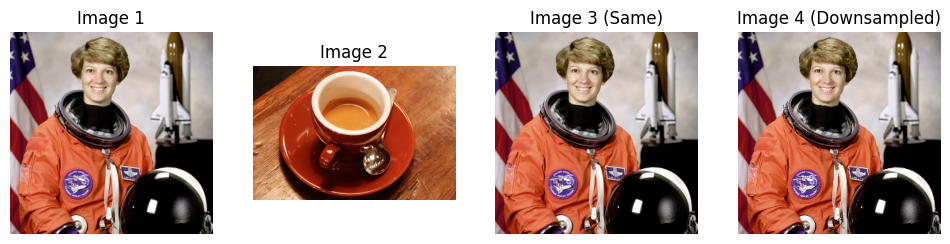

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_ubyte, io, color
from scipy.spatial import distance

def calculate_rgb_histogram(image, bins=16):
    img_uint8 = img_as_ubyte(image)
    hist_r, _ = np.histogram(img_uint8[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(img_uint8[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(img_uint8[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_combined = hist_combined.astype(float) / np.sum(hist_combined)
    return hist_combined

try:
    image1 = data.astronaut()
    image2 = data.coffee()
    image3 = data.astronaut()
    image4 = image1[::2, ::2, :]
except Exception as e:
    print(f"Gagal memuat data skimage: {e}. Membuat citra dummy.")
    image1 = np.random.rand(100, 100, 3)
    image2 = np.random.rand(100, 100, 3) * 0.5
    image3 = image1.copy()
    image4 = image1[::2,::2,:]

hist1 = calculate_rgb_histogram(image1)
hist2 = calculate_rgb_histogram(image2)
hist3 = calculate_rgb_histogram(image3)
hist4 = calculate_rgb_histogram(image4)

sim_12 = 1 - distance.cosine(hist1, hist2)
sim_13 = 1 - distance.cosine(hist1, hist3)
sim_14 = 1 - distance.cosine(hist1, hist4)

print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 2 (Coffee): {sim_12:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 3 (Astronaut): {sim_13:.4f}")
print(f"Cosine Similarity antara Image 1 (Astronaut) dan Image 4 (Astronaut Downsampled): {sim_14:.4f}")

fig, axes = plt.subplots(1, 4, figsize=(12, 3))
axes[0].imshow(image1); axes[0].set_title('Image 1'); axes[0].axis('off')
axes[1].imshow(image2); axes[1].set_title('Image 2'); axes[1].axis('off')
axes[2].imshow(image3); axes[2].set_title('Image 3 (Same)'); axes[2].axis('off')
axes[3].imshow(image4); axes[3].set_title('Image 4 (Downsampled)'); axes[3].axis('off')
plt.show()


#Praktikum 3 – SSIM

SSIM (Ref vs Same): 1.0000
SSIM (Ref vs Noisy): 0.2948
SSIM (Ref vs Contrast): 0.9651
SSIM (Ref vs Blurred): 0.8027


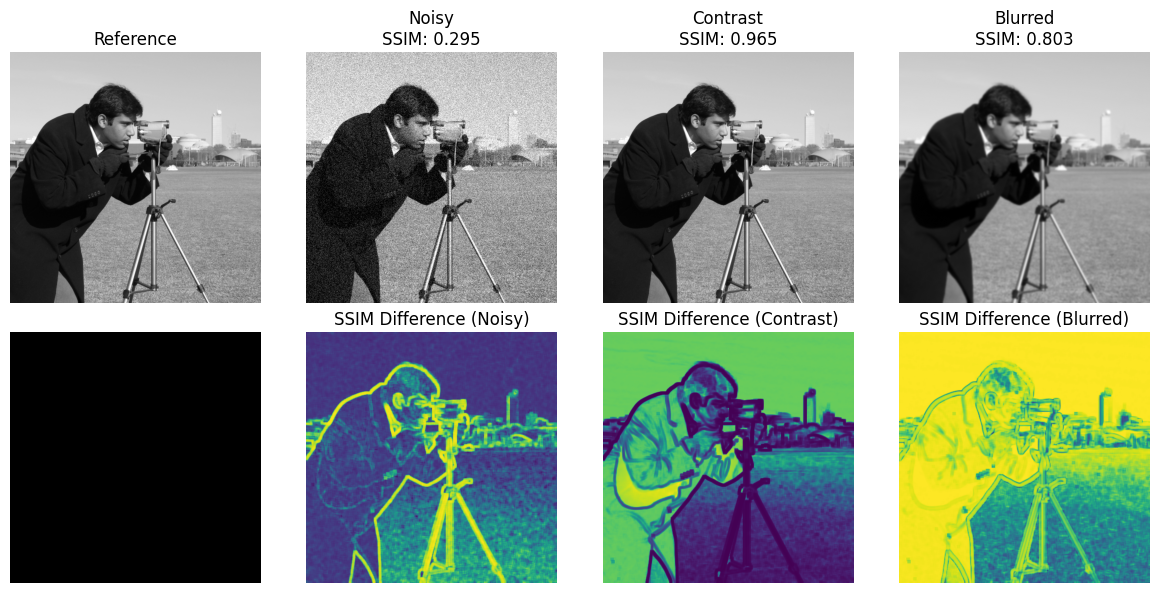

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.transform import resize
from skimage.util import random_noise
from skimage.filters import gaussian

image_ref = img_as_float(data.camera())
image_same = image_ref.copy()
image_noisy = random_noise(image_ref, mode='gaussian', var=0.01)
image_contrast = np.clip(image_ref * 0.8, 0, 1)
image_blurred = gaussian(image_ref, sigma=1.5, channel_axis=None)

data_range = image_ref.max() - image_ref.min()

ssim_same, _ = ssim(image_ref, image_same, data_range=data_range, full=True)
ssim_noisy, diff_noisy = ssim(image_ref, image_noisy, data_range=data_range, full=True)
ssim_contrast, diff_contrast = ssim(image_ref, image_contrast, data_range=data_range, full=True)
ssim_blurred, diff_blurred = ssim(image_ref, image_blurred, data_range=data_range, full=True)

print(f"SSIM (Ref vs Same): {ssim_same:.4f}")
print(f"SSIM (Ref vs Noisy): {ssim_noisy:.4f}")
print(f"SSIM (Ref vs Contrast): {ssim_contrast:.4f}")
print(f"SSIM (Ref vs Blurred): {ssim_blurred:.4f}")

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
ax = axes.ravel()
ax[0].imshow(image_ref, cmap='gray'); ax[0].set_title('Reference'); ax[0].axis('off')
ax[1].imshow(image_noisy, cmap='gray'); ax[1].set_title(f'Noisy\nSSIM: {ssim_noisy:.3f}'); ax[1].axis('off')
ax[2].imshow(image_contrast, cmap='gray'); ax[2].set_title(f'Contrast\nSSIM: {ssim_contrast:.3f}'); ax[2].axis('off')
ax[3].imshow(image_blurred, cmap='gray'); ax[3].set_title(f'Blurred\nSSIM: {ssim_blurred:.3f}'); ax[3].axis('off')
ax[4].imshow(np.zeros_like(image_ref), cmap='gray'); ax[4].set_title(''); ax[4].axis('off')
ax[5].imshow(diff_noisy, cmap='viridis'); ax[5].set_title('SSIM Difference (Noisy)'); ax[5].axis('off')
ax[6].imshow(diff_contrast, cmap='viridis'); ax[6].set_title('SSIM Difference (Contrast)'); ax[6].axis('off')
ax[7].imshow(diff_blurred, cmap='viridis'); ax[7].set_title('SSIM Difference (Blurred)'); ax[7].axis('off')
plt.tight_layout()
plt.show()


#Praktikum 4 – Template Matching

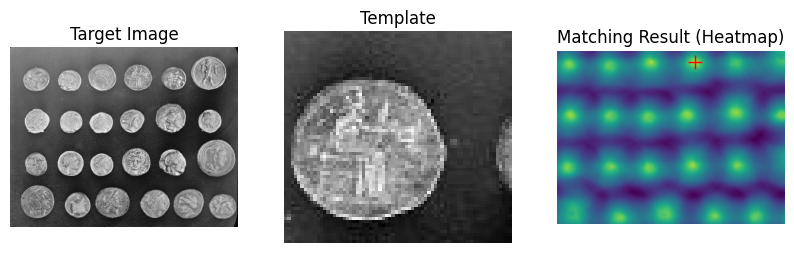

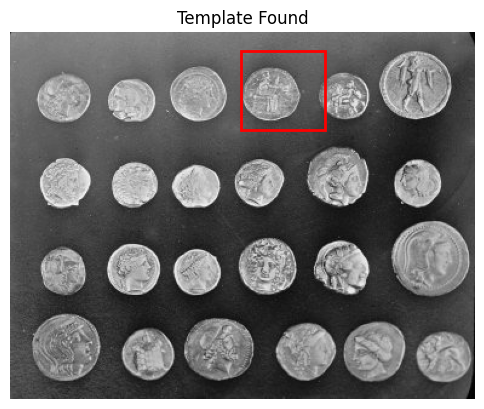

Template ditemukan di koordinat (x,y): (190, 15)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template

image = data.coins()
template = image[15:80, 190:260]

result = match_template(image, template)
ij = np.unravel_index(np.argmax(result), result.shape)
x, y = ij[::-1]

fig, ax = plt.subplots(1, 3, figsize=(10, 4))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Target Image')
ax[0].set_axis_off()

ax[1].imshow(template, cmap='gray')
ax[1].set_title('Template')
ax[1].set_axis_off()

ax[2].imshow(result, cmap='viridis')
ax[2].set_title('Matching Result (Heatmap)')
ax[2].set_axis_off()
ax[2].plot(x, y, 'r+', markersize=10)

fig2, ax_main = plt.subplots(figsize=(6, 6))
ax_main.imshow(image, cmap='gray')
ax_main.set_title('Template Found')
ax_main.set_axis_off()
h, w = template.shape
rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none', lw=2)
ax_main.add_patch(rect)
plt.show()

print(f"Template ditemukan di koordinat (x,y): ({x}, {y})")


#Praktikum 5 – CBIR (Content-Based Image Retrieval)

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (semakin ke kanan, semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: coins (Distance: 0.288)
Rank 3: coffee (Distance: 0.359)
Rank 4: astronaut (Distance: 0.461)
Rank 5: camera (Distance: 0.602)


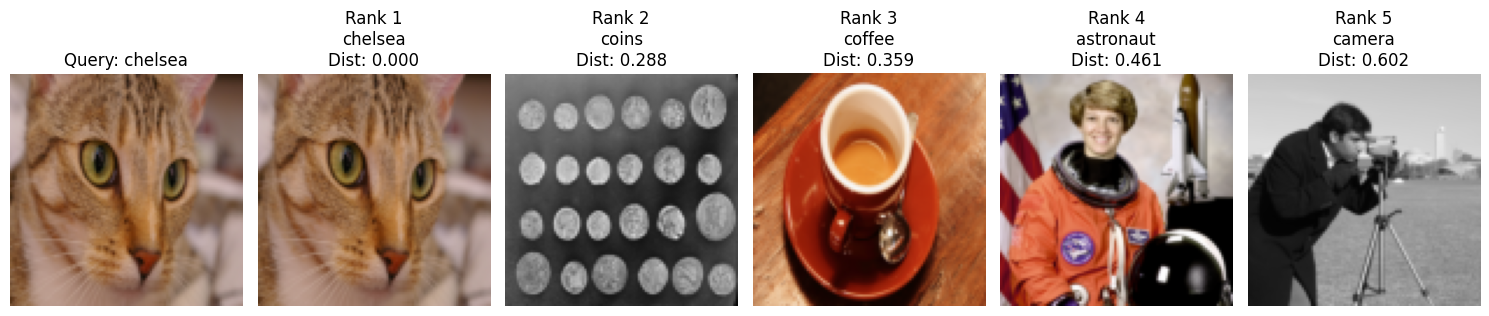

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, io, color, transform, img_as_float
from scipy.spatial import distance

def calculate_rgb_histogram(image, bins=16):
    if image.dtype == float:
        image = img_as_ubyte(image)
    hist_r, _ = np.histogram(image[:,:,0].ravel(), bins=bins, range=(0, 256))
    hist_g, _ = np.histogram(image[:,:,1].ravel(), bins=bins, range=(0, 256))
    hist_b, _ = np.histogram(image[:,:,2].ravel(), bins=bins, range=(0, 256))
    hist_combined = np.concatenate((hist_r, hist_g, hist_b))
    hist_sum = np.sum(hist_combined)
    if hist_sum > 0:
        hist_combined = hist_combined.astype(float) / hist_sum
    else:
        hist_combined = hist_combined.astype(float)
    return hist_combined

image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_hists = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_hists.append(calculate_rgb_histogram(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_hist = database_hists[query_index]

distances = []
for i, hist in enumerate(database_hists):
    dist = distance.cosine(query_hist, hist)
    distances.append(dist)

sorted_indices = np.argsort(distances)
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (semakin ke kanan, semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

for j in range(num_results_to_show + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#Fitur Berbeda untuk CBIR

Memproses database citra...
- astronaut diproses.
- camera diproses.
- coffee diproses.
- coins diproses.
- chelsea diproses.

Hasil Retrieval (Mean RGB, semakin ke kanan semakin tidak mirip):
Rank 1: chelsea (Distance: 0.000)
Rank 2: astronaut (Distance: 0.050)
Rank 3: coffee (Distance: 0.176)
Rank 4: camera (Distance: 0.194)
Rank 5: coins (Distance: 0.211)


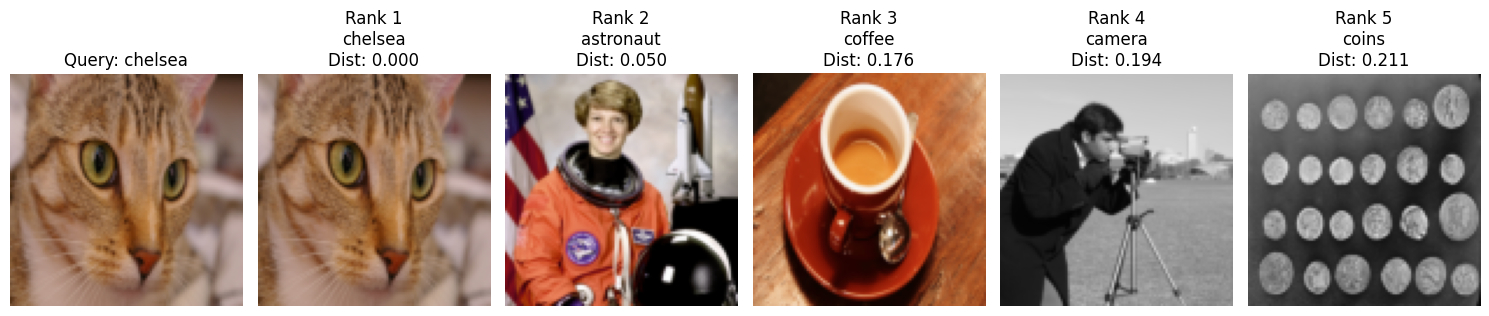

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, transform, img_as_float
from scipy.spatial import distance

# Fungsi untuk menghitung rata-rata warna (mean R, G, B)
def calculate_mean_rgb(image):
    if image.ndim == 2:
        image = color.gray2rgb(image)
    mean_r = np.mean(image[:, :, 0])
    mean_g = np.mean(image[:, :, 1])
    mean_b = np.mean(image[:, :, 2])
    return np.array([mean_r, mean_g, mean_b])

# 1. Siapkan 'database' citra dan query
image_db_names = ["astronaut", "camera", "coffee", "coins", "chelsea"]
database_images = []
database_means = []

print("Memproses database citra...")
for name in image_db_names:
    try:
        img = getattr(data, name)()
        if img.ndim == 2:
            img = color.gray2rgb(img)
        img_resized = transform.resize(img, (100, 100), anti_aliasing=True)
        database_images.append(img_resized)
        database_means.append(calculate_mean_rgb(img_resized))
        print(f"- {name} diproses.")
    except Exception as e:
        print(f"Error memproses {name}: {e}")

# 2. Pilih query
query_image_name = "chelsea"
query_index = image_db_names.index(query_image_name)
query_image = database_images[query_index]
query_feature = database_means[query_index]

# 3. Hitung jarak Euclidean antar fitur rata-rata
distances = []
for i, feat in enumerate(database_means):
    dist = distance.euclidean(query_feature, feat)
    distances.append(dist)

# 4. Urutkan dan tampilkan hasil
sorted_indices = np.argsort(distances)
num_results_to_show = len(database_images)
fig, axes = plt.subplots(1, num_results_to_show + 1, figsize=(15, 3))

# Tampilkan query
axes[0].imshow(query_image)
axes[0].set_title(f"Query: {query_image_name}")
axes[0].axis('off')

print("\nHasil Retrieval (Mean RGB, semakin ke kanan semakin tidak mirip):")
for i, idx in enumerate(sorted_indices):
    img_rank = i + 1
    ax = axes[img_rank]
    ax.imshow(database_images[idx])
    ax.set_title(f"Rank {img_rank}\n{image_db_names[idx]}\nDist: {distances[idx]:.3f}")
    ax.axis('off')
    print(f"Rank {img_rank}: {image_db_names[idx]} (Distance: {distances[idx]:.3f})")

plt.tight_layout()
plt.show()


#Template Matching Invariant

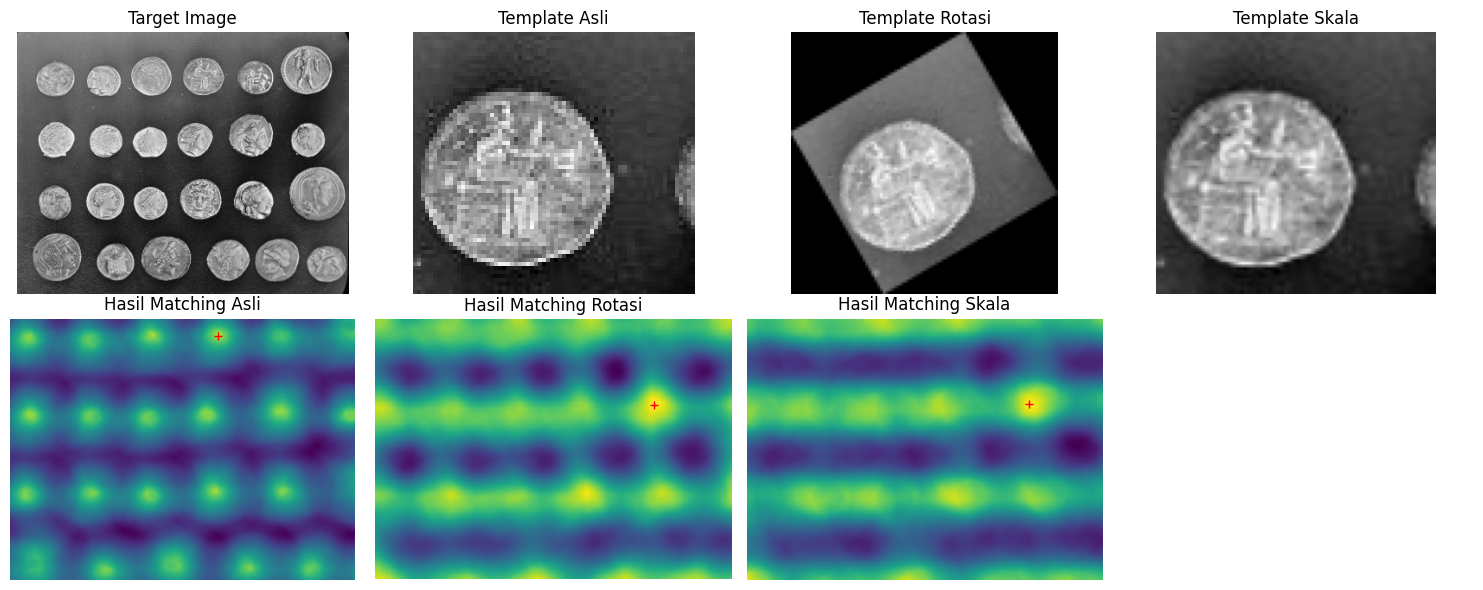

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, transform
from skimage.feature import match_template

# 1. Ambil gambar dan template
image = data.coins()
template = image[15:80, 190:260]

# 2. Ubah template: rotasi dan skala
template_rotated = transform.rotate(template, angle=30, resize=True)
template_scaled = transform.rescale(template, scale=1.5, anti_aliasing=True)

# 3. Matching template asli
result_original = match_template(image, template)
ij_original = np.unravel_index(np.argmax(result_original), result_original.shape)
x_orig, y_orig = ij_original[::-1]

# 4. Matching template rotasi
result_rotated = match_template(image, template_rotated)
ij_rot = np.unravel_index(np.argmax(result_rotated), result_rotated.shape)
x_rot, y_rot = ij_rot[::-1]

# 5. Matching template skala
result_scaled = match_template(image, template_scaled)
ij_scl = np.unravel_index(np.argmax(result_scaled), result_scaled.shape)
x_scl, y_scl = ij_scl[::-1]

# 6. Visualisasi
fig, axes = plt.subplots(2, 4, figsize=(15, 6))

axes[0,0].imshow(image, cmap='gray')
axes[0,0].set_title("Target Image")
axes[0,0].axis('off')

axes[0,1].imshow(template, cmap='gray')
axes[0,1].set_title("Template Asli")
axes[0,1].axis('off')

axes[0,2].imshow(template_rotated, cmap='gray')
axes[0,2].set_title("Template Rotasi")
axes[0,2].axis('off')

axes[0,3].imshow(template_scaled, cmap='gray')
axes[0,3].set_title("Template Skala")
axes[0,3].axis('off')

axes[1,0].imshow(result_original, cmap='viridis')
axes[1,0].plot(x_orig, y_orig, 'r+')
axes[1,0].set_title("Hasil Matching Asli")
axes[1,0].axis('off')

axes[1,1].imshow(result_rotated, cmap='viridis')
axes[1,1].plot(x_rot, y_rot, 'r+')
axes[1,1].set_title("Hasil Matching Rotasi")
axes[1,1].axis('off')

axes[1,2].imshow(result_scaled, cmap='viridis')
axes[1,2].plot(x_scl, y_scl, 'r+')
axes[1,2].set_title("Hasil Matching Skala")
axes[1,2].axis('off')

axes[1,3].axis('off')  # kosong

plt.tight_layout()
plt.show()
